In [1]:
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt

**1**.(20 points)

Consider the following system of equations:

$$\begin{align*}
2x_1& - x_2&    +x_3    &=& 6\\
-x_1& +2x_2& -  x_3 &=& 2\\
 x_1   &  -x_2& + x_3 &=& 1
\end{align*}$$

1. Consider the system in matrix form $Ax=b$ and define $A$, $b$ in numpy. (5 points)
2. Show that $A$ is positive-definite (5 points)
3. Use the appropriate matrix decomposition function in numpy and back-substitution to solve the system (10 points)

In [27]:
# Define A and b
A = np.array([2, -1, 1, -1, 2, -1, 1, -1, 1]).reshape(3, 3)
b = np.array([6, 2, 1]).reshape(-1, 1)

# Print A and b
print(A)
print(b)

[[ 2 -1  1]
 [-1  2 -1]
 [ 1 -1  1]]
[[6]
 [2]
 [1]]


*We verify that A is positive definite by (1) visually confirming that it is a symmetric matrix and (2) showing that all three eigenvalues of A are positive.*

In [28]:
np.linalg.eigvals(A)

array([3.73205081, 1.        , 0.26794919])

*Since A is positive definite, we can use the Cholesky decomposition to solve the system of equations.*

*After obtaining the Cholesky decomposition, A = CC', we can solve the following two equations in order using backwards substitution:*

- Cy = b
- C'x = y

*We show these 3 steps in order below*

In [29]:
# Find C
C = np.linalg.cholesky(A)
C

array([[ 1.41421356,  0.        ,  0.        ],
       [-0.70710678,  1.22474487,  0.        ],
       [ 0.70710678, -0.40824829,  0.57735027]])

In [5]:
# Solve Cy = b
y = la.solve_triangular(C, b, lower=True)
y

array([[ 4.24264069],
       [ 4.0824829 ],
       [-0.57735027]])

In [6]:
# Solve C'x = y, which returns the result of the original system
la.solve_triangular(C.T, y)

array([[ 5.],
       [ 3.],
       [-1.]])

*We can check our answer by simply solving the original system without the matrix decomposition*

In [14]:
np.linalg.solve(A, b)

array([[ 5.],
       [ 3.],
       [-1.]])

*In the event that the backsubstitution is meant to be manual (i.e., not using a solve function), we can do so as follows*

In [35]:
# print C for reference
print(C)

# Initialize and solve for y (from Cy = b)
y = np.zeros(A.shape[0]).reshape(-1, 1)
y[0] = b[0] / C[0, 0]
y[1] = (b[1] - C[1, 0] * y[0]) / C[1, 1]
y[2] = (b[2] - C[2, 0] * y[0] - C[2, 1] * y[1]) / C[2, 2]
y

[[ 1.41421356  0.          0.        ]
 [-0.70710678  1.22474487  0.        ]
 [ 0.70710678 -0.40824829  0.57735027]]


array([[ 4.24264069],
       [ 4.0824829 ],
       [-0.57735027]])

In [33]:
# Print C' for reference
print(C.T)

# Initialize and solve for x (from C'x = y)
x = np.zeros(A.shape[0]).reshape(-1, 1)
x[2] = y[2] / C.T[2, 2]
x[1] = (y[1] - C.T[1, 2] * x[2]) / C.T[1, 1]
x[0] = (y[0] - C.T[0, 2] * x[2] - C.T[0, 1] * x[1]) / C[0, 0]
x

[[ 1.41421356 -0.70710678  0.70710678]
 [ 0.          1.22474487 -0.40824829]
 [ 0.          0.          0.57735027]]


array([[ 5.],
       [ 3.],
       [-1.]])

**2**. (20 points)

Exact geometric solutions with $n = m$

- Find the equation of the line that passes through the points (2,1) and (3,7)
- Find the equation of the circle that passes through the points (1,7), (6,2) and (4,6)

Hint: The equation of a circle can be written as

$$
(x - a)^2 + (y - b)^2 = r^2
$$

*We can start with finding a line that passes through the points (2, 1) and (3, 7). To do so, we solve the equation y = X$\beta$. The y values are given directly in the points, as is the 2nd column of the X matrix. We just have to remember to add a column of ones to the beginning of the X matrix to determine the intercept*

In [30]:
# Define and solve system
y = np.array([1, 7]).reshape(-1, 1)
X = np.array([1, 2, 1, 3]).reshape(-1, 2)
β = np.linalg.solve(X, y)

# Print out equation of line
print('y = ' + str(β[0][0]) + ' + ' + str(β[1][0]) + 'x')

y = -11.0 + 6.0x


*To fit a circle that goes through the points (1, 7), (6, 2), and (4, 6), we can also recognize that the equation of a circle can be written as $Ax + By + C = x^2 + y^2$*

*Once we solve for A, B, and C, we'll be able to determine the equation of the circle*

In [31]:
# Define and solve system
y = np.array([1**2 + 7**2, 6**2 + 2**2, 4**2 + 6**2]).reshape(-1, 1)
A = np.array([1, 7, 1, 6, 2, 1, 4, 6, 1]).reshape(3, -1)
x = np.linalg.solve(A, y)

# Extract a, b, and r-squared from result
a = np.round(x[0][0] / 2, decimals = 3)
b = np.round(x[1][0] / 2, decimals = 3)
r2 = np.round(x[2][0] + a**2 + b**2, decimals = 3)

# Print equation of circle
print('(x - ' + str(a) + ')^2 + (y - ' + str(b) + ")^2 = " + str(r2))

(x - 1.0)^2 + (y - 2.0)^2 = 25.0


**3**. 20 points

- Load the matrix in `Q2.npy` - this consists of two columns representing the x and y coordinates of 10 points
- Find the equation of the circle that best fits these points
- Plot the points and fitted circle

Hint: You need to estimate the center of the circle and its radius.

*Similarly to the last problem, we'll solve $Ax + By + C = x^2 + y^2$. However, this time, there will not be an exact solution because m > n. As a result, we'll need to use the least squares solution*

In [43]:
# Load data
data = np.load('Q2.npy')

# Define and solve system
y = (data ** 2).sum(axis = 1).reshape(-1, 1)
A = np.c_[data, np.ones(shape = y.shape[0]).reshape(-1, 1)]
x, res, rank, s, = la.lstsq(A, y)

# Extract a, b, and r-squared from result
a = np.round(x[0][0] / 2, decimals = 3)
b = np.round(x[1][0] / 2, decimals = 3)
r2 = np.round(x[2][0] + a**2 + b**2, decimals = 3)

# Print equation of circle
print('(x - ' + str(a) + ')^2 + (y + ' + str(np.abs(b)) + ")^2 = " + str(r2))

(x - 0.024)^2 + (y + 0.035)^2 = 4.031


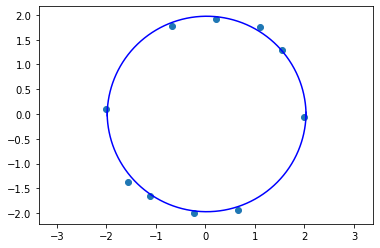

In [77]:
# Plot the points
plt.scatter(x = data[:, 0], y = data[:, 1]);

# Plot fitted circle
x_fit = np.linspace(start = a - np.sqrt(r2), stop = a + np.sqrt(r2), num = 1000)
y_fit = np.sqrt(r2 - (x_fit - a) ** 2) + b
plt.plot(x_fit, y_fit, 'b');
plt.plot(x_fit, -y_fit, 'b');
plt.axis('equal');

**4**. 20 points

The figure below shows the current population of Durham, Chapel Hill and Raleigh. Arrows show fractions that move between cities each year.

- What are the population sizes of the 3 cities after 3 years have passed?
- Find the steady state population of the 3 cities by solving a linear system.

Assume no births, deaths or any other fluxes other than those shown.

![img](Q3.png)

*From the diagram above, we can write the following system of equations in matrix form:*

$\begin{pmatrix} CH \\ D \\ R \end{pmatrix}_{n+1} = \begin{pmatrix} 0.5 & 0.05 & 0.2 \\ 0.2 & 0.9 & 0 \\ 0.3 & 0.05 & 0.8 \end{pmatrix} \begin{pmatrix} CH \\ D \\ R \end{pmatrix}_n$ 

*We also note that* $\begin{pmatrix} CH \\ D \\ R \end{pmatrix}_0 = \begin{pmatrix} 80,000 \\ 300,000 \\ 500,000 \end{pmatrix}$

*We can solve this problem by performing a change of basis, using an eigenvector basis:* $A = V\Lambda V^{-1}$ where V is a matrix of eigenvectors and $\Lambda$ is a diagonal matrix of eigenvalues. This approach will allow us to both easily calculate the population sizes after 3 years and find the steady state population

In [2]:
# Perform spectral decomposition
A = np.array([0.5, 0.05, 0.2, 0.2, 0.9, 0, 0.3, 0.05, 0.8]).reshape(3, 3)
x0 = np.array([80000, 300000, 500000]).reshape(-1, 1)
e, V = la.eig(A)
Λ = np.diag(e)

# Confirm that decomposition worked properly... should return A
np.round((V @ Λ @ np.linalg.inv(V)).real, decimals = 2)

array([[0.5 , 0.05, 0.2 ],
       [0.2 , 0.9 , 0.  ],
       [0.3 , 0.05, 0.8 ]])

*We can calculate the population sizes of the 3 cities after 3 years have passed by using the following equation:*

$\begin{pmatrix} CH \\ D \\ R \end{pmatrix}_3 = V \Lambda ^3 V \begin{pmatrix} CH \\ D \\ R \end{pmatrix}_0$

In [99]:
(V @ np.power(Λ, 3) @ np.linalg.inv(V) @ x0).real

array([[186620.],
       [295480.],
       [397900.]])

*We can find the steady state population by inspecting the eigenvalues and eigenvectors. We see that two of the eigenvalues are less than 1 and one eigenvalue is equal to 1. As n approaches infinity, the eigenvector corresponding to the eigenvalue of 1 will fully define the ratio of populations between the 3 cities.*

In [101]:
# Print eigenvalues and eigenvectors
Λ.real, V

(array([[0.35505103, 0.        , 0.        ],
        [0.        , 1.        , 0.        ],
        [0.        , 0.        , 0.84494897]]),
 array([[ 0.80703591, -0.33333333,  0.21753892],
        [-0.2961877 , -0.66666667, -0.79031741],
        [-0.51084821, -0.66666667,  0.57277849]]))

In [108]:
# Calculate steady state populations
x0.sum() * (V[:, 1] / V[:, 1].sum()).reshape(-1, 1)

array([[176000.],
       [352000.],
       [352000.]])

*To increase our confidence that the above logic and calculations are correct, we can also calculate the city populations for a large value of n (say 1,000) and see how close the answers are. Below, we see that the answers are virtually identical.*

In [111]:
np.round((V @ np.power(Λ, 1000) @ np.linalg.inv(V) @ x0).real, decimals = 1)

array([[176000.],
       [352000.],
       [352000.]])

**5** (20 points)

The file `Q5.npy` contains the x and y coordinates in cols 1 and 2 respectively. 

- Find a cubic polynomial model to fit the data using the normal equations
- Provide a geometric interpretation of the solution in terms of projection of a vector onto a space. What is the vector, what is the basis of the space, and what does the numerical solution you obtained represent?

In [120]:
# Load data, and extract x and y values
data = np.load('Q5.npy')
x = data[:, 0]
y = data[:, 1]

# Create matrix, A
A = np.c_[np.ones(shape = x.shape[0]), x, x ** 2, x ** 3]

# Solve for beta using the normal equations
β = np.linalg.inv(A.T @ A) @ A.T @ y
β

array([-1.99235962, -1.02188927, -0.54438689,  0.99809019])

In [121]:
# Compare result from normal equations with result from scipy least squares function
β2, res, rank, s, = la.lstsq(A, y)
β2

array([-1.99235962, -1.02188927, -0.54438689,  0.99809019])

*We are faced with a problem in which we have 100 (x, y) data points and are interested in fitting y as a cubic polynomial of x. As a result, we need to solve a 100x4 matrix, X, which includes a column of ones to model an intercept and 3 columns corresponding to different powers of x (1, 2, 3). Since m >>n, it is highly unlikely that an exact solution exists.*

*Stated geometrically, we have a vector, y, which does not lie in the column space of X. Using the normal equations, we are able to find a projection of y, $\widehat{y} = X \widehat{\beta}$*, which lies in the column space of X. To answer the different components of the question directly:*

- Vector: y
- Space of interest: The column space of X
- Basis of the space: Since X in invertible, the columns of X form a basis of the column space of X
- Numerical solution: $\widehat{\beta}$ is the set of coefficients for $\widehat{y} = X \widehat{\beta}$ such that the sum of squared residuals is minimized. The resulting vector, $\widehat{y}$, is a projection of y into the column space of X